In [1]:
# We'll scrape fbref for top 5 european leagues data to build a radar chart

import pandas as pd

url = 'https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats'

df = pd.read_html(url, attrs={"id":"stats_standard"})

df = df[0]

df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1     Rodrigo Abajas             es ESP                 DF   
1                  2     James Abankwah             ie IRL                 DF   
2                  3  Keyliane Abdallah             fr FRA                 FW   
3                  4   Yunis Abdelhamid             ma MAR                 DF   
4                  5      Himad Abdelli             dz ALG              MF,FW   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
               Squad               Comp                Age               Born   
0           Valencia         es La Liga             21-191               2003   
1            Udinese         it Serie A             20-308               2004   
2          Marseille         fr Ligue 1             18-228               2006   
3      Saint-Étienne         fr Ligue 1             37-052               1987   
4             Angers         fr Ligue 1             25-002               1999   

  Playing Time         ... Per 90 Minutes                                 \
            MP Starts  ...            Ast   G+A  G-PK G+A-PK    xG   xAG   
0            1      1  ...           0.00  0.00  0.00   0.00  0.10  0.00   
1            2      0  ...           0.00  0.00  0.00   0.00  0.00  0.00   
2            1      0  ...           0.00  0.00  0.00   0.00  0.00  0.00   
3            7      7  ...           0.00  0.00  0.00   0.00  0.04  0.00   
4           11     11  ...           0.09  0.37  0.09   0.19  0.33  0.11   

                        Unnamed: 37_level_0  
  xG+xAG  npxG npxG+xAG             Matches  
0   0.10  0.10     0.10             Matches  
1   0.00  0.00     0.00             Matches  
2   0.00  0.00     0.00             Matches  
3   0.04  0.04     0.04             Matches  
4   0.45  0.11     0.23             Matches  

[5 rows x 38 columns]

In [2]:
# notice that the column names are a bit weird, so will fix that

# getting rid of the per 90 columns and will recalculate the ones we're interested in
df = df[df.columns.drop(list(df.filter(regex='Per 90')))]

df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player             Nation                Pos   
0                  1     Rodrigo Abajas             es ESP                 DF   
1                  2     James Abankwah             ie IRL                 DF   
2                  3  Keyliane Abdallah             fr FRA                 FW   
3                  4   Yunis Abdelhamid             ma MAR                 DF   
4                  5      Himad Abdelli             dz ALG              MF,FW   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
               Squad               Comp                Age               Born   
0           Valencia         es La Liga             21-191               2003   
1            Udinese         it Serie A             20-308               2004   
2          Marseille         fr Ligue 1             18-228               2006   
3      Saint-Étienne         fr Ligue 1             37-052               1987   
4             Angers         fr Ligue 1             25-002               1999   

  Playing Time         ... Performance      Expected                     \
            MP Starts  ...        CrdY CrdR       xG npxG  xAG npxG+xAG   
0            1      1  ...           1    0      0.1  0.1  0.0      0.1   
1            2      0  ...           0    0      0.0  0.0  0.0      0.0   
2            1      0  ...           0    0      0.0  0.0  0.0      0.0   
3            7      7  ...           1    0      0.2  0.2  0.0      0.3   
4           11     11  ...           1    0      3.6  1.2  1.2      2.5   

  Progression           Unnamed: 37_level_0  
         PrgC PrgP PrgR             Matches  
0           3    2    3             Matches  
1           1    0    0             Matches  
2           1    0    0             Matches  
3           3   16    3             Matches  
4          42   73   43             Matches  

[5 rows x 28 columns]

In [3]:
# This will get rid of the first level of the multiindex on the columns
df = df.droplevel(0, axis=1)

In [4]:
# We Are only going to be looking at FWs so we will filter the data to only include those players
# As well we only want to be looking at player who have played more than 400 minutes

# The reason we are only looking at FWs is because we want to compare players who play in similar positions
# The reason we are only looking at players who have played more than 400 minutes is because we want to compare players who have played a significant amount of time and we don't want to inflate stats of players by comparing them to players who have played very little
df = df[df['Pos'].str.contains('FW')]
df = df[df['Min'].astype(int) > 400]
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Matches
4,5,Himad Abdelli,dz ALG,"MF,FW",Angers,fr Ligue 1,25-002,1999,11,11,...,1,0,3.6,1.2,1.2,2.5,42,73,43,Matches
10,11,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,21-236,2003,11,10,...,1,0,1.5,1.5,0.7,2.1,20,21,54,Matches
12,13,Zakaria Aboukhlal,ma MAR,"FW,MF",Toulouse,fr Ligue 1,24-275,2000,11,10,...,1,0,5.7,4.9,1.0,5.9,13,12,71,Matches
18,19,Akor Adams,ng NGA,FW,Montpellier,fr Ligue 1,24-295,2000,11,10,...,2,0,4.0,4.0,0.7,4.7,6,5,29,Matches
19,20,Che Adams,sct SCO,FW,Torino,it Serie A,28-129,1996,11,8,...,0,0,2.3,2.3,1.0,3.2,7,6,35,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,2272,Bryan Zaragoza,es ESP,"FW,MF",Osasuna,es La Liga,23-208,2001,13,11,...,3,0,1.8,1.8,1.9,3.7,48,23,76,Matches
2372,2282,Edon Zhegrova,xk KVX,"FW,MF",Lille,fr Ligue 1,25-233,1999,9,9,...,1,0,1.4,1.4,2.1,3.5,29,38,63,Matches
2375,2285,Joshua Zirkzee,nl NED,FW,Manchester Utd,eng Premier League,23-181,2001,11,4,...,1,0,2.6,2.6,0.6,3.2,2,15,20,Matches
2377,2287,Nadir Zortea,it ITA,"DF,FW",Cagliari,it Serie A,25-153,1999,9,7,...,0,0,0.9,0.9,0.4,1.3,15,16,24,Matches


In [5]:
# Now let's calculate the percentiles for each player in the columns we're interested in
# We can calculate the percentiles using the .rank() method

# Let's look at the columns we are interested in
df[['90s', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'PrgC', 'PrgP', 'PrgR']].head(10)

# let's also make sure that the columns are of the correct type
df[['90s', 'xG', 'xAG']] = df[['90s', 'xG', 'xAG']].astype(float)
df[['Gls', 'Ast', 'G+A', 'PrgC', 'PrgP', 'PrgR']] = df[['Gls', 'Ast', 'G+A', 'PrgC', 'PrgP', 'PrgR']].astype(int)

In [6]:
# Now let's calculate the per 90 stats for each of these columns
# But we will name them as we want to see them in the radar plot
df['goals_per_90'] = df['Gls'] / df['90s']
df['assists_per_90'] = df['Ast'] / df['90s']
df['goals_assists_per_90'] = df['G+A'] / df['90s']
df['expected_goals_per_90'] = df['xG'] / df['90s']
df['expected_assists_per_90'] = df['xAG'] / df['90s']
df['progressive_carries_per_90'] = df['PrgC'] / df['90s']
df['progressive_passes_per_90'] = df['PrgP'] / df['90s']
df['progressive_receptions_per_90'] = df['PrgR'] / df['90s']

In [7]:
# We'll calculate the percentiles for each of these columns
# We will also name them as we want to see them in the radar plot
df['Goals'] = (df['goals_per_90'].rank(pct=True) * 100).astype(int)
df['Assists'] = (df['assists_per_90'].rank(pct=True) * 100).astype(int)
df['Goals + Assists'] = (df['goals_assists_per_90'].rank(pct=True) * 100).astype(int)
df['Expected Goals'] = (df['expected_goals_per_90'].rank(pct=True)  * 100).astype(int)
df['Expected Assists'] = (df['expected_assists_per_90'].rank(pct=True) * 100).astype(int)
df['Progressive Carries'] = (df['progressive_carries_per_90'].rank(pct=True) * 100).astype(int)
df['Progressive Passes'] = (df['progressive_passes_per_90'].rank(pct=True) * 100).astype(int)
df['Progressive Receptions'] = (df['progressive_receptions_per_90'].rank(pct=True) * 100).astype(int)

In [8]:
# Now that we have our data, lets start by plotting a radar plot for a single player

from mplsoccer import Radar

In [9]:
# Let's plot a radar for Mbappe
mbappe = df[df['Player'] == 'Kylian Mbappé']
mbappe

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,progressive_passes_per_90,progressive_receptions_per_90,Goals,Assists,Goals + Assists,Expected Goals,Expected Assists,Progressive Carries,Progressive Passes,Progressive Receptions
1412,1359,Kylian Mbappé,fr FRA,FW,Real Madrid,es La Liga,25-335,1998,11,11,...,4.519231,11.826923,87,37,78,97,29,87,85,94


In [10]:
columns_to_plot = [
    'Goals', 'Assists', 'Goals + Assists', 'Expected Goals', 
    'Expected Assists', 'Progressive Carries', 'Progressive Passes', 'Progressive Receptions'
]

# If there was a stat that meant having a lower value was better we can use the parameter
# lower_is_better to make the radar plot reflect that
# example: lower_is_better=['Goals Conceded']
# And then add that parameter to the Radar object

radar = Radar(
    # These are the columns we want to plot
    params=columns_to_plot,
    min_range=[0 for _ in columns_to_plot],# Since we are plotting percentiles the minimum value is 0
    max_range=[100 for _ in columns_to_plot], # The maximum value is the maximum percentile
    # lower_is_better=lower_is_better
)

Text(0, 0.05, 'Metrics show per 90 percentile stats\n\nComparing against all forwards\nwith at least 400 minutes played ')

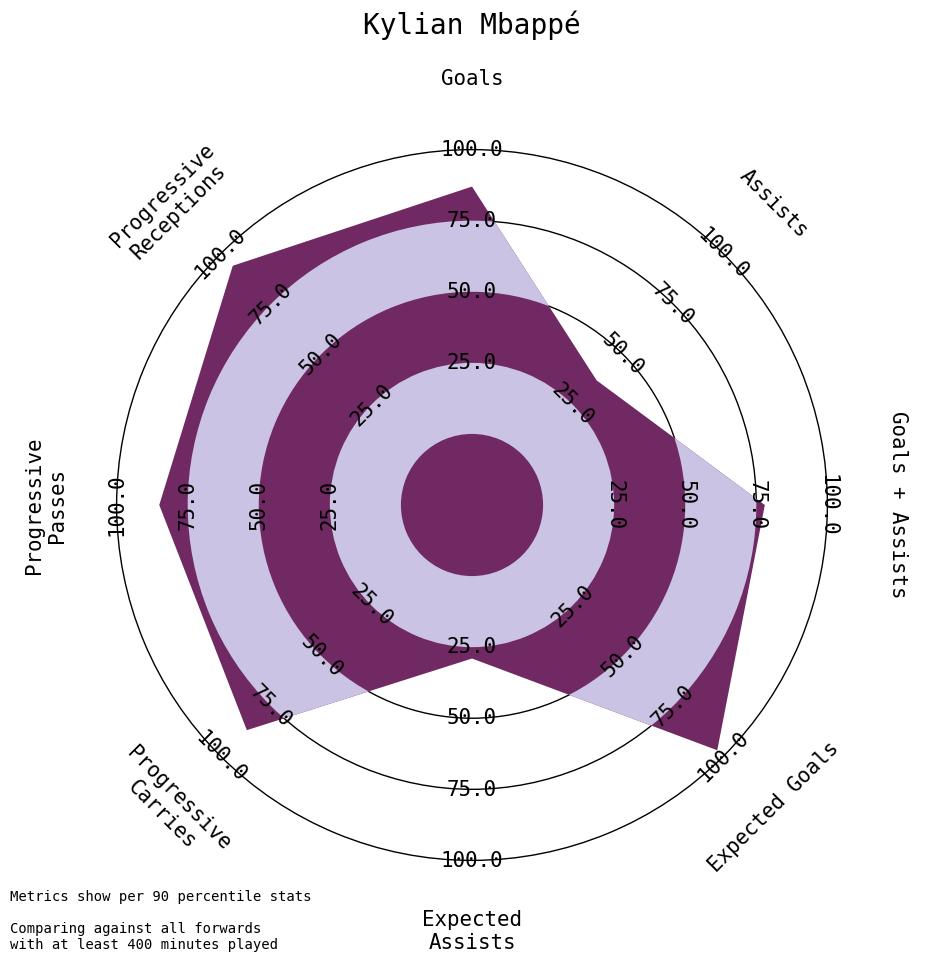

In [11]:
fig, ax = radar.setup_axis()

rings_inner = radar.draw_circles(
    ax=ax, facecolor='white', edgecolor='black', lw=1, zorder=1
)

radar_output = radar.draw_radar(
    ax=ax,
    values=mbappe[columns_to_plot].values.flatten().tolist(),
    kwargs_radar={'facecolor': '#702963'},
    kwargs_rings={'facecolor': '#CBC3E3'}
)

range_labels = radar.draw_range_labels(
    ax=ax, fontsize=15,
   fontproperties="monospace"
)
# draw the range labels
param_labels = radar.draw_param_labels(
    ax=ax, fontsize=15,
    fontproperties="monospace"
)

# Let's add some text to the plot
ax.text(
    x=0.5, y=1.02, s='Kylian Mbappé', fontsize=20,
    ha='center', va='center', transform=ax.transAxes,
    fontfamily='monospace'
)

# Lets add some text to the lower left corner
ax.text(
    x=0, y=0.05, s='Metrics show per 90 percentile stats\n\nComparing against all forwards\nwith at least 400 minutes played ', fontsize=10,
    ha='left', va='center', transform=ax.transAxes, fontfamily='monospace'
)

In [12]:
# Now let's compare two players
# We'll compare Palmer and Haaland

haaland = df[df['Player'] == 'Erling Haaland']

palmer = df[df['Player'] == 'Cole Palmer']

Text(0, 0.05, 'Metrics show per 90 stats\n\nComparing against all forwards\nwith at least 400 minutes played\nin Europes Top 5 Domestic Leagues\n\n@FiveStat')

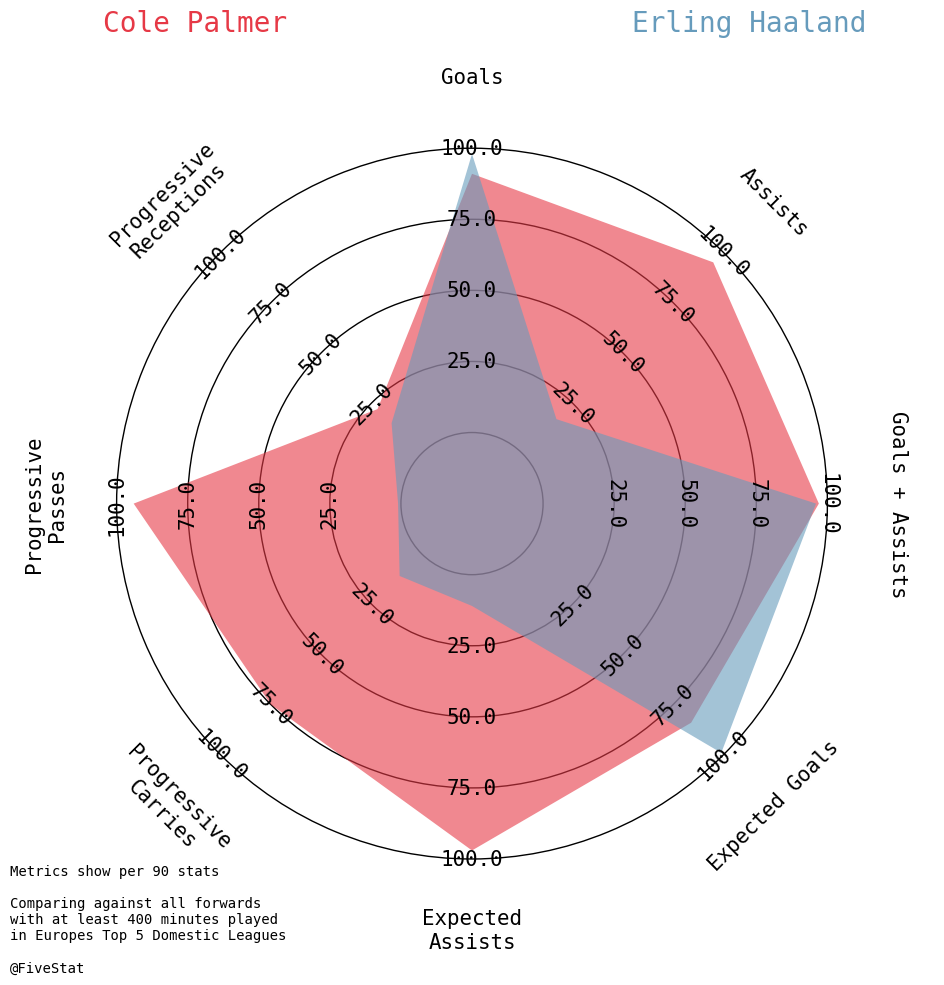

In [13]:
fig, ax = radar.setup_axis()

rings_inner = radar.draw_circles(
    ax=ax, facecolor='white', edgecolor='black', lw=1, zorder=1
)

radar_output = radar.draw_radar_compare(
    ax=ax,
    values=palmer[columns_to_plot].values.flatten().tolist(),
    compare_values=haaland[columns_to_plot].values.flatten().tolist(),
    kwargs_radar={'facecolor': '#e63946', 'alpha': 0.6},
    kwargs_compare={'facecolor': '#669bbc', 'alpha': 0.6}
)

range_labels = radar.draw_range_labels(
    ax=ax, fontsize=15,
   fontproperties="monospace"
)

param_labels = radar.draw_param_labels(
    ax=ax, fontsize=15,
    fontproperties="monospace"
)

# Let's add some text to the plot
ax.text(
    x=0.2, y=1.02, s='Cole Palmer', fontsize=20,
    ha='center', va='center', transform=ax.transAxes,
    fontfamily='monospace', color='#e63946'
)

ax.text(
    x=0.8, y=1.02, s='Erling Haaland', fontsize=20,
    ha='center', va='center', transform=ax.transAxes,
    fontfamily='monospace', color='#669bbc'
)

# Lets add some text to the lower left corner
ax.text(
    x=0, y=0.05, s='Metrics show per 90 stats\n\nComparing against all forwards\nwith at least 400 minutes played\nin Europes Top 5 Domestic Leagues\n\n@FiveStat', fontsize=10,
    ha='left', va='center', transform=ax.transAxes, fontfamily='monospace'
)

In [ ]:
# save the radar plot
fig.savefig('/Users/mckayjohns/Desktop/pizza_plot.png', dpi=300, bbox_inches='tight')